# 3. Korean Morphological Analysis and Wordcloud

## 3.1. 한글 형태소 분석

한글 입력 문자열을 형태소열로 바꾸는 작업

- 형태소 분석: "띄어쓰기 단위의 어절인 단어(word)를 구성하는 각각의 형태소들을 인식하고 용언의 활용, 불규칙 활용이나 축약, 탈락현상이 일어난 형태소는 원형을 복원하는 과정 (강승식,『한국어 형태소 분석과 정보검색, 2002)" 

- 한글 품사 부착 말뭉치: 세종 태그 세트 (http://kkma.snu.ac.kr/documents/?doc=postag)

## 3.2. 한글 형태소 분석기 종류

- 꼬꼬마 http://kkma.snu.ac.kr

- 한나눔 http://semanticweb.kaist.ac.kr

- Komoran http://shineware.tistory.com/entry/KOMORAN-ver-24

- Okt (Twitter-Korean-text) https://github.com/twitter/twitter-korean-text


## 3.3. KoNLPy

https://konlpy-ko.readthedocs.io/ko/v0.4.3/

한글은 형태소분석을 통해 데이터를 정규화(normalize). 
형태소분석은 주로 조사 등을 제거한 후, 동사/형용사 등을 기본형으로 복원하는 것을 포함한다. 

In [1]:
import konlpy

In [19]:
from konlpy.tag import Okt, Kkma, Mecab, Hannanum
t = Okt()
kkma = Kkma()
mecab = Mecab() # mecab은 윈도우에서 사용 불가
hannanum = Hannanum()

In [2]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs('코모란 형태소 분석기를 사용하면 품사별로 단어를 추출할 수 있어요.'))

['코모', '란', '형태소', '분석기', '를', '사용', '하', '면', '품사', '별', '로', '단어', '를', '추출', '하', 'ㄹ', '수', '있', '어요', '.']


In [1]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma()
text = "오늘 서울의 날씨는 추워질 전망입니다. 오후 한때 소나기가 올 예정입니다."
sentences = kkma.sentences(text)
sentences[1]


'오후 한때 소나기가 올 예정입니다.'

In [2]:
kkma.nouns(text)

['오늘', '서울', '날씨', '전망', '오후', '한때', '소나기', '예정']

In [3]:
kkma.pos(text)

[('오늘', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('ㄹ', 'ETD'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('ㄹ', 'ETD'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [3]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs('이것도 되나욬ㅋㅋ', norm=True))

['이', '것', '도', '되나요', 'ㅋㅋ']


### konlpy corpus 예: 대한민국 헌법 조항

In [4]:
from konlpy.corpus import kolaw
fids = kolaw.fileids()
fids

['constitution.txt']

In [5]:
ko_data = kolaw.open('constitution.txt').read()
ko_data

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

## 3.4. 한글 형태소 분석 실습 - 국민 청원 데이터로 실습하기

참고: https://github.com/corazzon/petitionWrangling <br>
데이터 출처 : https://github.com/akngs/petitions <br>
데이터: petition.csv 


In [2]:
import pandas as pd
import numpy as np

In [3]:
#같은 경로에 데이터를 설치한 후 불러온다
petitions = pd.read_csv('./petition.csv', index_col=0, parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(395547, 7)

In [12]:
petitions.head(10)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...
28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
29,2017-08-19,2017-09-18,0,3,미래,문재인 정부는 왜 공무원개혁엔 무관심한가?,살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...


In [13]:
petitions.tail(10)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
517110,2019-02-04,2019-03-06,0,11,정치개혁,국회 당 대표 법개정 필요,현재 실행 되고 있는 국회 당 대표 선출 방식에 문제점을 개혁이 필요합니다\n국민이...
517111,2019-02-04,2019-03-06,0,0,교통/건축/국토,부동산가격을 공시지가 수준으로 돌리는 방법,* 방법의 핵심은\n1. 공시지가에서 실거래가 차이를 양도차액으로 정하고 이에 대해...
517112,2019-02-04,2019-03-06,0,7,보건복지,보육원생 자립지원 관심이 필요합니다,보육원에서 자라난 아이들이\n18세에 500만원 손에 쥐고 자립해야하다니요?\n돈만...
517115,2019-02-04,2019-03-06,0,100,문화/예술/체육/언론,KBS의 명절 특선 영화의 자막 방영을 강력하게 규탄하며 이에 청원합니다.,애초부터 공영 방송인 KBS에서 명절 특선 영화로 자막으로 된 영화를 방영해주면 선...
517116,2019-02-04,2019-03-06,0,1,교통/건축/국토,부동산 가격 안정 및 거래 활성화 방안! 김현미 장관님 꼭 보세요!,* 방법의 핵심은\n1. 공시지가에서 실거래가 차이를 양도차액으로 정하고 이에 대해...
517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."


In [14]:
petitions_content = str(petitions['content'])

In [15]:
from collections import Counter
counter = Counter(petitions_content)

print(counter.most_common(10))
print(len(petitions_content))

[(' ', 978), ('.', 211), ('1', 80), ('\n', 62), ('이', 53), ('5', 49), ('7', 46), ('하', 45), ('는', 42), ('0', 41)]
3715


In [16]:
counter = Counter(petitions['content'])

print(counter.most_common(10))
print(len(petitions['content']))

[('이명박 출국금지', 597), ('이명박출국금지', 267), ('동의합니다', 165), ('출국금지', 120), ('.', 115), ('이명박 출국 금지', 106), ('조두순 출소 반대합니다.', 105), ("[본문에 타인의 명의 등 개인정보가 무분별하게 과다하게 노출되어 본문의 내용은 홈페이지 관리자에 의해 '숨김' 처리 되었습니다.]", 101), ('조두순 출소 반대합니다', 97), ('이명박 출국금지 청원합니다', 92)]
395547


In [22]:
petitions_content_kkma = kkma.sentences(petitions_content)
print(len(petitions_content_kkma))
petitions_content_kkma[:5]

36


['article_id 21 스텔라 데이지 호에 대한 제안입니다.',
 '\\n3 월 31일 스텔라 데이지 호가 침몰하고 5 달째가... 22 현 정부에 국민들이 가장 원하는 것은 부패 척결입니다.',
 '우리 사회에 각종 비리들이 ... 23 만일 하시는 대통령님 및 각 부처 장관님, 주무관님 들 안녕 하세요!! \\n 전 남 목포에서 ... 24 현정부에서 정규직 일자리를 늘리는 것에 찬성합니다.',
 '그런 데 공공기관 비정규직들은 인... 25 만일 하시는 대통령님 및 각 부처 장관님, 주무관님 들 안녕 하세요!! \\n 전 남 목포에서 ... 26 청원인 왕 기 운 \\n 서울 도봉구 창동 삼성아파트 101-1103 호 \\n 청원 취지 \\n 보... 27 문 대통령님께 묻습니다',
 '(2017. 8. 19) \\n 저는 경기도 용인에 살고 있는 국... 28 ** 존경하옵는 문 재인 대통령님께 \\n 저는 중국 원양자원이라는 KOSPI 상장사의 소액 ... 29 살충 제 계란 사건으로 국민들을 불안케 하고 있다.']

In [23]:
petitions_content_kkma = kkma.pos(petitions_content)
print(len(petitions_content_kkma))
petitions_content_kkma[:10]

1585


[('article', 'OL'),
 ('_', 'SW'),
 ('id', 'OL'),
 ('21', 'NR'),
 ('스텔라', 'NNG'),
 ('데이지', 'NNG'),
 ('호', 'NNG'),
 ('에', 'JKM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD')]

In [24]:
petitions_content_han = hannanum.nouns(petitions_content)
print(len(petitions_content_han))
petitions_content_han[:10]

540


['article_id', '21', '스텔라', '데이지호', '제안', '\\n3월31', '스텔라', '데이지호', '침몰', '5달']

In [37]:
example = petitions['content'][:1]
example

article_id
21    스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
Name: content, dtype: object

In [39]:
example = example[21]
example

'스텔라 데이지호에 대한 제안입니다.\\n3월31일 스텔라 데이지호가 침몰하고 5달째가 되고 있습니다.\\n저는 우리가 너무 일찍 포기한 것이 아닌가 하는 생각을 갖고 있습니다.\\n그리고, 추후 이 사고에 대한 확실한 해결이 없다면 나중에는 문재인 정부에 커다란 부담이 될 수도 있다는 생각에 이 글을 쓰게 되었습니다.\\n가족들이 지금까지 갖고 있는 희망은 발견되지 않은 구명벌(땟목)에 선원들이 살아있지 않을까 하는 겁니다.\\n생존 훈련받은 선원들이 대부분이고 구명벌에는 지붕과 생존도구가 구비되어있기 때문에 오랜 기간 버틸 수 있을 거라 보는 겁니다.\\n이전 정권이 대선이전에 서둘러 수색을 중단한 탓도 있고, 정권교체 후 재수색이 있었지만,\\n태평양, 3000m 수심이라는 데서, 애초 우리가 마음속에서 너무 일찍 포기한 게 아닌가 하는 생각이 듭니다.\\n멕시코에서는 14개월 동안 표류하다 구조된 어부도 있고,\\n과태말라에서 요트가 전복되어 태평양을 117일간 표류하던 어떤 부부가 한국어선에 의해 구조되는 일도 있었다는데,\\n구명벌을 찾을 때 까지 포기하면 안된다고 생각합니다.\\n구명벌이 침몰당시 분리된 것이 맞는지 확인하고,\\n선박의 침몰 원인을 찾기 위해서도 심해를 탐사할 수 있는 장비를 통한 수색도 필요하다고 생각합니다.\\n선박의 침몰에 대해서는 선사의 노후선박 개조와 사전 균열 등, 의혹이 제기되고 있는 상황입니다.\\n구명벌이 선박에서 분리되지 못했다면 구명벌 수색은 필요 없는 것이 되고 침몰원인만 확인하면 되는 것입니다.\\n물론 불가능하거나 실패할 수도 있지만 적어도 정부가 할 수 있는 모든 걸 했다는 것을 보여줘야 한다고 봅니다.\\n침몰 당시 자동발신 조난신호의 위치나 수동발신 조난신호 발생위치가 확인되고 있고, AIS나 레이다, 인공위성사진 등을 이용하면 침몰위치 특정은 어려운 것이 아니고,\\n현재 유인 심해 탐사정의 심해탐사기록이 일본 6500m, 중국 7,062m인 걸 보면 아주 불가능한 일은 아닐 수도 있다고 봅니다.\

In [40]:
# 개행문자 제거
import re
example_sub = re.sub('\\\\n', ' ', example)
example_sub

'스텔라 데이지호에 대한 제안입니다. 3월31일 스텔라 데이지호가 침몰하고 5달째가 되고 있습니다. 저는 우리가 너무 일찍 포기한 것이 아닌가 하는 생각을 갖고 있습니다. 그리고, 추후 이 사고에 대한 확실한 해결이 없다면 나중에는 문재인 정부에 커다란 부담이 될 수도 있다는 생각에 이 글을 쓰게 되었습니다. 가족들이 지금까지 갖고 있는 희망은 발견되지 않은 구명벌(땟목)에 선원들이 살아있지 않을까 하는 겁니다. 생존 훈련받은 선원들이 대부분이고 구명벌에는 지붕과 생존도구가 구비되어있기 때문에 오랜 기간 버틸 수 있을 거라 보는 겁니다. 이전 정권이 대선이전에 서둘러 수색을 중단한 탓도 있고, 정권교체 후 재수색이 있었지만, 태평양, 3000m 수심이라는 데서, 애초 우리가 마음속에서 너무 일찍 포기한 게 아닌가 하는 생각이 듭니다. 멕시코에서는 14개월 동안 표류하다 구조된 어부도 있고, 과태말라에서 요트가 전복되어 태평양을 117일간 표류하던 어떤 부부가 한국어선에 의해 구조되는 일도 있었다는데, 구명벌을 찾을 때 까지 포기하면 안된다고 생각합니다. 구명벌이 침몰당시 분리된 것이 맞는지 확인하고, 선박의 침몰 원인을 찾기 위해서도 심해를 탐사할 수 있는 장비를 통한 수색도 필요하다고 생각합니다. 선박의 침몰에 대해서는 선사의 노후선박 개조와 사전 균열 등, 의혹이 제기되고 있는 상황입니다. 구명벌이 선박에서 분리되지 못했다면 구명벌 수색은 필요 없는 것이 되고 침몰원인만 확인하면 되는 것입니다. 물론 불가능하거나 실패할 수도 있지만 적어도 정부가 할 수 있는 모든 걸 했다는 것을 보여줘야 한다고 봅니다. 침몰 당시 자동발신 조난신호의 위치나 수동발신 조난신호 발생위치가 확인되고 있고, AIS나 레이다, 인공위성사진 등을 이용하면 침몰위치 특정은 어려운 것이 아니고, 현재 유인 심해 탐사정의 심해탐사기록이 일본 6500m, 중국 7,062m인 걸 보면 아주 불가능한 일은 아닐 수도 있다고 봅니다. 애초에 사고가 발생했을 때 해수부는 국방부에 협조를 구해서 구

In [41]:
# 토큰화
example_token = example_sub.split()
example_token[:10]

['스텔라', '데이지호에', '대한', '제안입니다.', '3월31일', '스텔라', '데이지호가', '침몰하고', '5달째가', '되고']

In [42]:
# 트위터 형태소 분석기로 품사 태깅
example_pos = t.pos(example_sub, norm=True, stem=True)
example_pos[:10]

[('스텔라', 'Noun'),
 ('데이지', 'Noun'),
 ('호에', 'Exclamation'),
 ('대한', 'Noun'),
 ('제안', 'Noun'),
 ('이다', 'Adjective'),
 ('.', 'Punctuation'),
 ('3월', 'Number'),
 ('31일', 'Number'),
 ('스텔라', 'Noun')]

In [43]:
import nltk
nltk_text = nltk.Text(example_pos, name='petition')

In [44]:
print(len(nltk_text))
print(len(nltk_text.tokens))
print(len(set(nltk_text.tokens)))

548
548
254


In [45]:
nltk_text.vocab().most_common(30)

[(('하다', 'Verb'), 20),
 (('.', 'Punctuation'), 19),
 (('있다', 'Adjective'), 16),
 (('이', 'Josa'), 16),
 ((',', 'Punctuation'), 16),
 (('에', 'Josa'), 16),
 (('되다', 'Verb'), 13),
 (('가', 'Josa'), 11),
 (('을', 'Josa'), 11),
 (('것', 'Noun'), 10),
 (('침몰', 'Noun'), 7),
 (('은', 'Josa'), 7),
 (('수색', 'Noun'), 7),
 (('보다', 'Verb'), 6),
 (('이다', 'Adjective'), 5),
 (('생각', 'Noun'), 5),
 (('구', 'Modifier'), 5),
 (('명벌', 'Noun'), 5),
 (('선박', 'Noun'), 5),
 (('를', 'Josa'), 5),
 (('대한', 'Noun'), 4),
 (('아니다', 'Adjective'), 4),
 (('정부', 'Noun'), 4),
 (('되어다', 'Verb'), 4),
 (('과', 'Josa'), 4),
 (('도', 'Josa'), 4),
 (('구조', 'Noun'), 4),
 (('구명', 'Noun'), 4),
 (('벌이', 'Noun'), 4),
 (('의', 'Josa'), 4)]

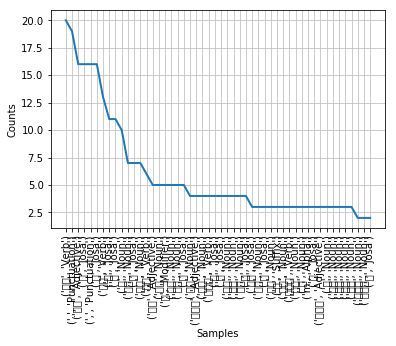

In [48]:
% matplotlib inline
nltk_text.plot(50)

In [49]:
%time petitions_kkma_title = kkma.nouns(''.join(str(petitions['title'])))
petitions_kkma_title[:10]

CPU times: user 3.08 s, sys: 1.07 s, total: 4.15 s
Wall time: 1.94 s


['21', '스텔라', '데이지', '데이지호', '호', '제안', '22', '비리', '비리제보처', '제보']

In [50]:
counter_kkma_title = Counter(petitions_kkma_title)

print(counter_kkma_title.most_common(200))
print(len(counter_kkma_title))

[('호', 2), ('조', 2), ('21', 1), ('스텔라', 1), ('데이지', 1), ('데이지호', 1), ('제안', 1), ('22', 1), ('비리', 1), ('비리제보처', 1), ('제보', 1), ('처', 1), ('23', 1), ('저', 1), ('2', 1), ('개성', 1), ('개성공단', 1), ('공단', 1), ('24', 1), ('공공', 1), ('공공기관', 1), ('기관', 1), ('적인', 1), ('정규직', 1), ('정규직전환', 1), ('전환', 1), ('반대', 1), ('25', 1), ('26', 1), ('복지부', 1), ('부령', 1), ('제', 1), ('제339호중', 1), ('339', 1), ('중', 1), ('특수', 1), ('특수의료장비', 1), ('의료', 1), ('장비', 1), ('운영', 1), ('규칙', 1), ('불합리', 1), ('행정', 1), ('27', 1), ('김', 1), ('김이수', 1), ('이수', 1), ('헌재', 1), ('헌재소장', 1), ('소장', 1), ('임명', 1), ('재고', 1), ('건의', 1), ('28', 1), ('소액', 1), ('소액주주', 1), ('주주', 1), ('보호', 1), ('29', 1), ('문', 1), ('문재인', 1), ('재인', 1), ('정부', 1), ('공무원', 1), ('공무원개혁', 1), ('개혁', 1), ('30', 1), ('기사', 1), ('관심', 1), ('31', 1), ('담배', 1), ('제조', 1), ('매매', 1), ('매매금지', 1), ('금지', 1), ('법안', 1), ('을', 1), ('제정', 1), ('부탁', 1), ('32', 1), ('조사', 1), ('조사요청', 1), ('요청', 1), ('33', 1), ('납득', 1), ('수', 1), ('장애', 1), ('재판정', 1), (

In [51]:
%time petitions_kkma_content = kkma.nouns(str(petitions['content']))
petitions_kkma_content[:10]

CPU times: user 4.63 s, sys: 72.5 ms, total: 4.71 s
Wall time: 2.23 s


['21', '스텔라', '데이지', '데이지호', '호', '제안', '3', '3월31일', '월', '31']

In [52]:
petitions_kkma_content = Counter(petitions_kkma_content)

print(petitions_kkma_content.most_common(200))
print(len(petitions_kkma_content))

[('호', 2), ('우리', 2), ('도', 2), ('수', 2), ('시', 2), ('년', 2), ('세', 2), ('21', 1), ('스텔라', 1), ('데이지', 1), ('데이지호', 1), ('제안', 1), ('3', 1), ('3월31일', 1), ('월', 1), ('31', 1), ('일', 1), ('데이지호가', 1), ('호가', 1), ('침몰', 1), ('5', 1), ('5달', 1), ('달', 1), ('22', 1), ('현', 1), ('정부', 1), ('국민', 1), ('부패', 1), ('부패척결', 1), ('척결', 1), ('사회', 1), ('각종', 1), ('비리', 1), ('23', 1), ('만', 1), ('만일', 1), ('대통령', 1), ('부처', 1), ('장관', 1), ('주무관', 1), ('안녕', 1), ('안녕하세', 1), ('하세', 1), ('전', 1), ('전남', 1), ('남', 1), ('목포', 1), ('24', 1), ('현정부', 1), ('정규직', 1), ('일자리', 1), ('찬성', 1), ('데', 1), ('공공', 1), ('공공기관', 1), ('기관', 1), ('인', 1), ('25', 1), ('26', 1), ('원인', 1), ('왕', 1), ('기', 1), ('운', 1), ('서울', 1), ('도봉', 1), ('도봉구', 1), ('구', 1), ('창동', 1), ('삼성', 1), ('삼성아파트', 1), ('아파트', 1), ('청원', 1), ('청원취지', 1), ('취지', 1), ('보', 1), ('27', 1), ('문', 1), ('2017', 1), ('8', 1), ('19', 1), ('저', 1), ('경기', 1), ('경기도', 1), ('용인', 1), ('국', 1), ('28', 1), ('존경', 1), ('문재인대통령', 1), ('재인', 1), ('중국', 1), 

In [53]:
%time petitions_kkma_pos_content = kkma.pos(str(petitions['content']))
print(len(petitions_kkma_pos_content))
petitions_kkma_pos_content[:10]

CPU times: user 4.86 s, sys: 69.8 ms, total: 4.93 s
Wall time: 2.8 s
1585


[('article', 'OL'),
 ('_', 'SW'),
 ('id', 'OL'),
 ('21', 'NR'),
 ('스텔라', 'NNG'),
 ('데이지', 'NNG'),
 ('호', 'NNG'),
 ('에', 'JKM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD')]

In [54]:
counter_kkma_pos_content = Counter(petitions_kkma_pos_content)

print(counter_kkma_pos_content.most_common(200))
print (" --- ")
print(len(counter_kkma_pos_content))

[(('...', 'SE'), 60), (('하', 'XSV'), 38), (('\\', 'SW'), 35), (('n', 'OL'), 35), (('ㄴ', 'ETD'), 30), (('.', 'SF'), 28), (('고', 'ECE'), 27), (('들', 'XSN'), 27), (('이', 'VCP'), 22), (('님', 'XSN'), 22), (('에', 'JKM'), 20), (('이', 'JKS'), 20), (('는', 'ETD'), 20), (('의', 'JKG'), 18), (('대통령', 'NNG'), 17), (('을', 'JKO'), 17), (('ㅂ니다', 'EFN'), 16), (('는', 'JX'), 14), ((',', 'SP'), 13), (('를', 'JKO'), 12), (('국민', 'NNG'), 11), (('하', 'VV'), 11), (('에서', 'JKM'), 11), (('은', 'JX'), 10), (('저', 'NP'), 10), (('전', 'NNG'), 9), (('으로', 'JKM'), 9), (('년', 'NNM'), 9), (('안녕', 'NNG'), 8), (('문', 'NNG'), 8), (('되', 'VV'), 8), (('로', 'JKM'), 8), (('어', 'ECS'), 8), (('있', 'VXV'), 7), (('재인', 'NNG'), 7), (('게', 'ECD'), 7), (('것', 'NNB'), 6), (('ㄹ', 'ETD'), 6), (('요', 'JX'), 6), (('정규직', 'NNG'), 6), (('세요', 'EFN'), 6), (('1', 'NR'), 6), ((':', 'SP'), 6), (('가', 'JKS'), 5), (('께', 'JKM'), 5), (('습니다', 'EFN'), 5), (('우리', 'NP'), 5), (('대한민국', 'NNG'), 5), (('임용', 'NNG'), 5), (('도', 'JX'), 5), (('대하', 'VV'), 4)

In [57]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 2.0MB/s ta 0:00:01


In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/AppleGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

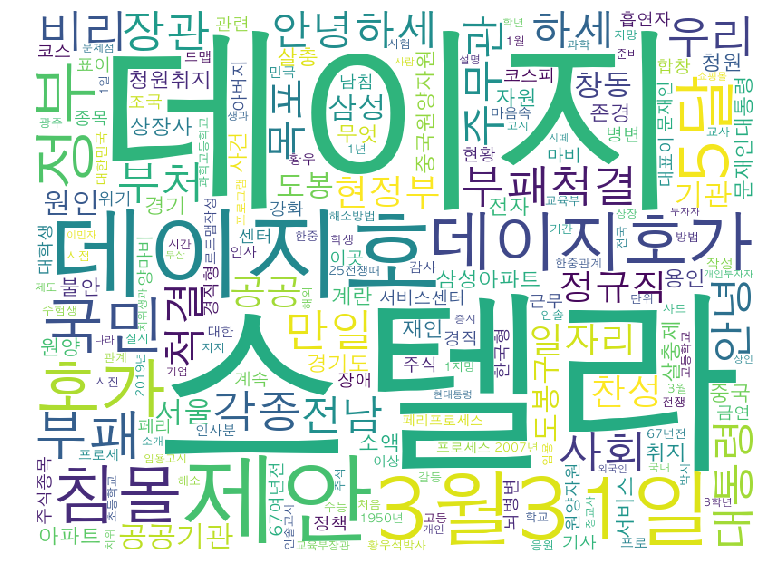

CPU times: user 2.84 s, sys: 363 ms, total: 3.21 s
Wall time: 3.31 s


In [65]:
%time displayWordCloud(' '.join(petitions_kkma_content))

## 실습.

### 한나눔(hannanum)으로 추출한 명사만으로 워드클라우드를 그려보자. kkma로 추출한 명사와 다른지 비교해보자. 

In [ ]:
#직접 해보기

### 정규직 단어가 들어가는 청원만 뽑아보기

In [73]:
fulltime = petitions[( petitions.title.str.find('정규직') != -1 ) | ( petitions.content.str.find('정규직') != -1  )]
fulltime.shape

(4901, 7)

In [74]:
fulltime_kkma = kkma.nouns(str(fulltime.content))
len(fulltime_kkma)

543

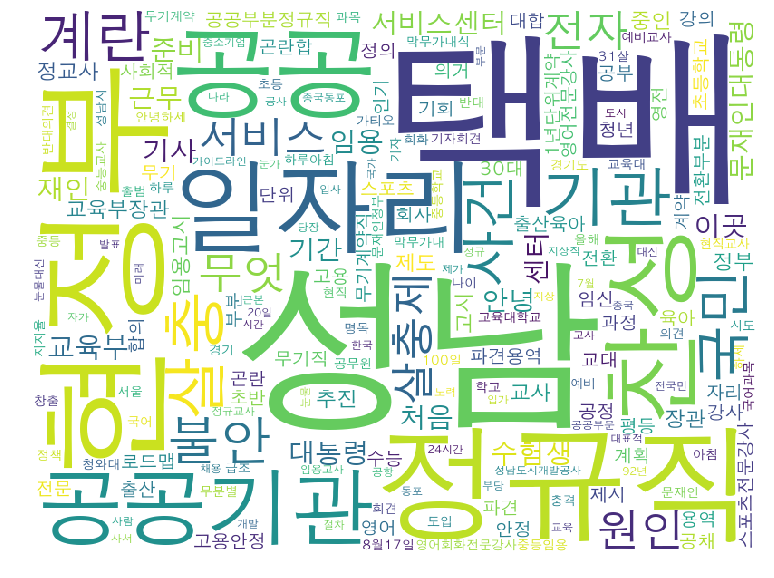

CPU times: user 2.76 s, sys: 343 ms, total: 3.11 s
Wall time: 3.5 s


In [76]:
%time displayWordCloud(' '.join(fulltime_kkma))

## 살충제라는 단어가 출현하는 것을 볼 수 있다. 이와 관련된 워드클라우드를 그려보자

In [77]:
bug = petitions[( petitions.title.str.find('살충제') != -1 ) | ( petitions.content.str.find('살충제') != -1  )]
bug.shape

(100, 7)

In [78]:
bug_hannanum = hannanum.nouns(str(bug.content))
len(bug_hannanum)

527

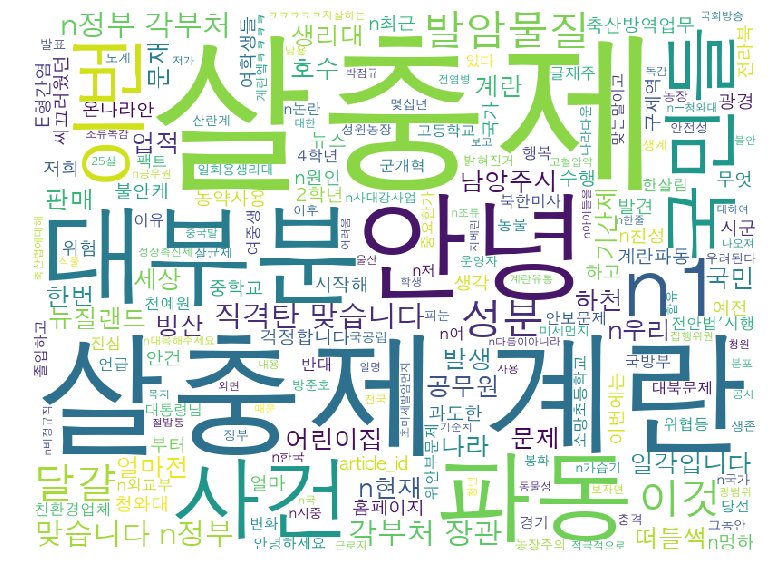

CPU times: user 3.08 s, sys: 313 ms, total: 3.39 s
Wall time: 3.51 s


In [79]:
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(bug_hannanum))

## 실습. '트럼프'와 관련된 단어로 이루어진 워드클라우드를 만들어보자.